In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pickle as pkl 

# Observations + Questions #
1. Why is the dot product dominated by negative values for large lr ? Expected less structure / more random.
2. Why does smaller lr shows this trend -> large positive dp -> equilibrates to random (or slightly negative) close to 0 .

# Notes
1. Small inner-lr and large outer lr might show that the local-geometry argument might be valid

Todo [ldery] - For the large lr case observe the behavior of the dot-product for the same primary task batch that was used to take the gradient step

# Primary Task = People #
# Auxiliary Tasks = {Flowers, Food_Containers} #

In [129]:
def plot(data, task_names):
    keys = ['task_weight', ' - task_grad', 'norm{theta_[t + 1]_dev}', 'norm{theta_[t]_task}', 'dot_prod { theta_[t + 1]_dev,  theta_[t]_task }']
    fig, ax = plt.subplots(len(task_names), len(keys), figsize=(35, 20))
    for j in range(data.shape[0]):
        for idx, key in enumerate(keys):
            mul_fact = 1.0
            label_ = "{} | {}".format(task_names[j], key)
            if idx == 1:
                mul_fact = -1.0
                corr_ = np.corrcoef(-data[j, :, idx], data[j, :, -1])[0, 1]
                norm = data[j, :, 2] * data[j, :, 3]
                corr_2 = np.corrcoef(-data[j, :, idx], data[j, :, -1] / norm)[0, 1]
                label_ = "[Corr w cosine = {:.3f}] {}".format(corr_2, key)
            ax[j][idx].plot(mul_fact * data[j, :, idx], label=label_)
            if idx == len(keys) - 1:
                ax[j][idx].plot([0.0]*data.shape[1], color='red')
            ax[j][idx].legend(prop={'size': 12})
            ax[j][idx].set_xlabel('Iteration[smoothed]')
    plt.show()

In [130]:
def vis_file(fname, smooth_factor=17):
    data = pkl.load(open(fname, 'rb'))
    task_names = list(data.keys())
    data_np = np.array(list(data.values()))
    max_len = (data_np.shape[1] // smooth_factor)*smooth_factor
    data_np = data_np[:, :max_len, :]
    data_np = np.reshape(data_np, (3, -1, smooth_factor, 5))
    data_np = data_np.mean(axis=2)
    print(data_np.shape)
    plot(data_np, task_names)
    return data_np

## WITHOUT GROUP BATCHING : Weight_lr = 5e-2 ##

In [134]:
files = glob("sgd_vis_tests/cleaned_code/*/*/*/weight_stats.pkl")
print(files)

['sgd_vis_tests/cleaned_code/small_lr/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/cleaned_code/large_lr/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/cleaned_code/stepped_lr/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/cleaned_code/smallInner.largeOuter.lr/meta_people/0/weight_stats.pkl']


# Small LR = 5e-3 #

(3, 850, 5)


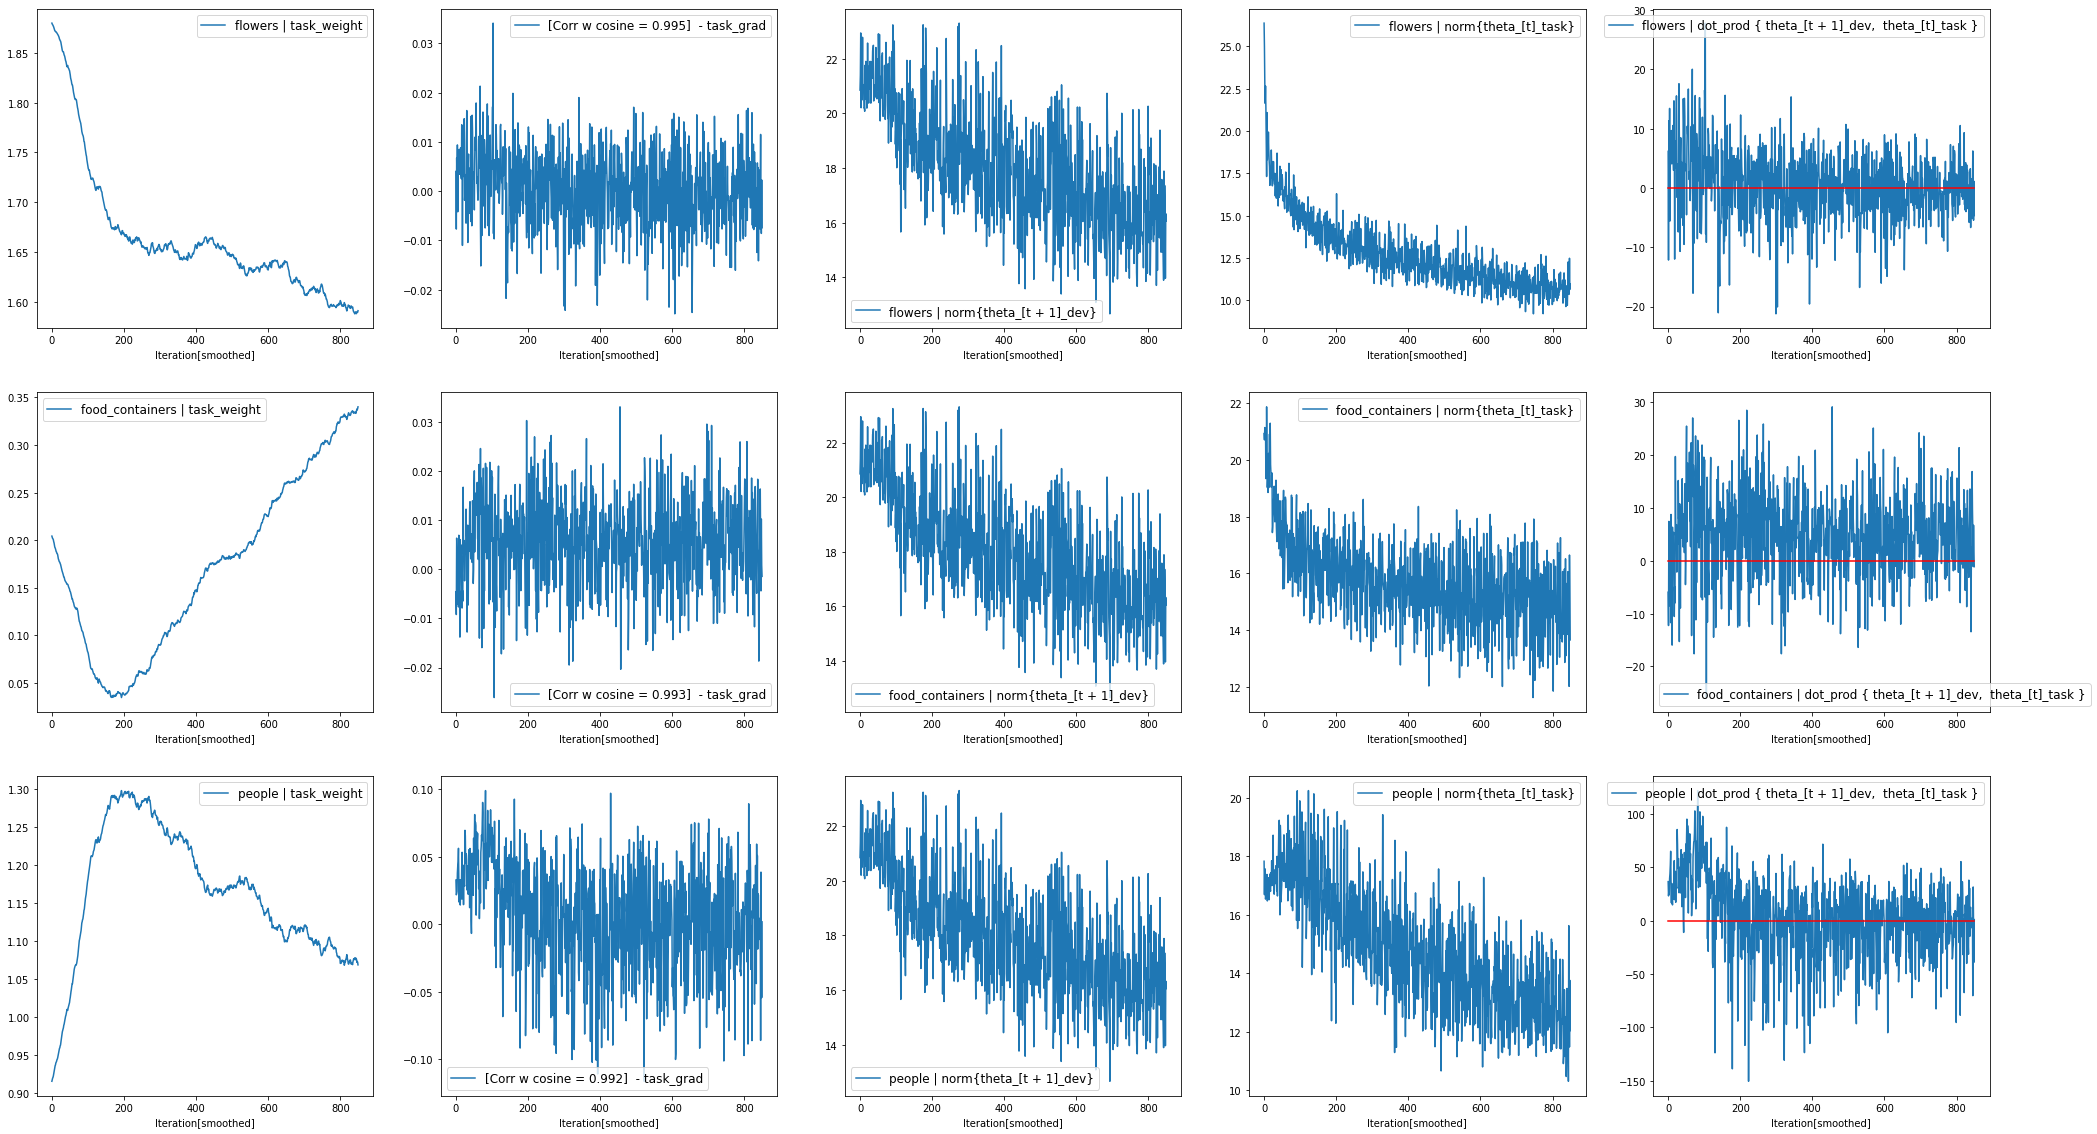

In [139]:
small_lr = 'sgd_vis_tests/cleaned_code/small_lr/meta_people/0/weight_stats.pkl'
_ = vis_file(small_lr, smooth_factor=2)

# Large LR  = 1e-1 #

(3, 850, 5)


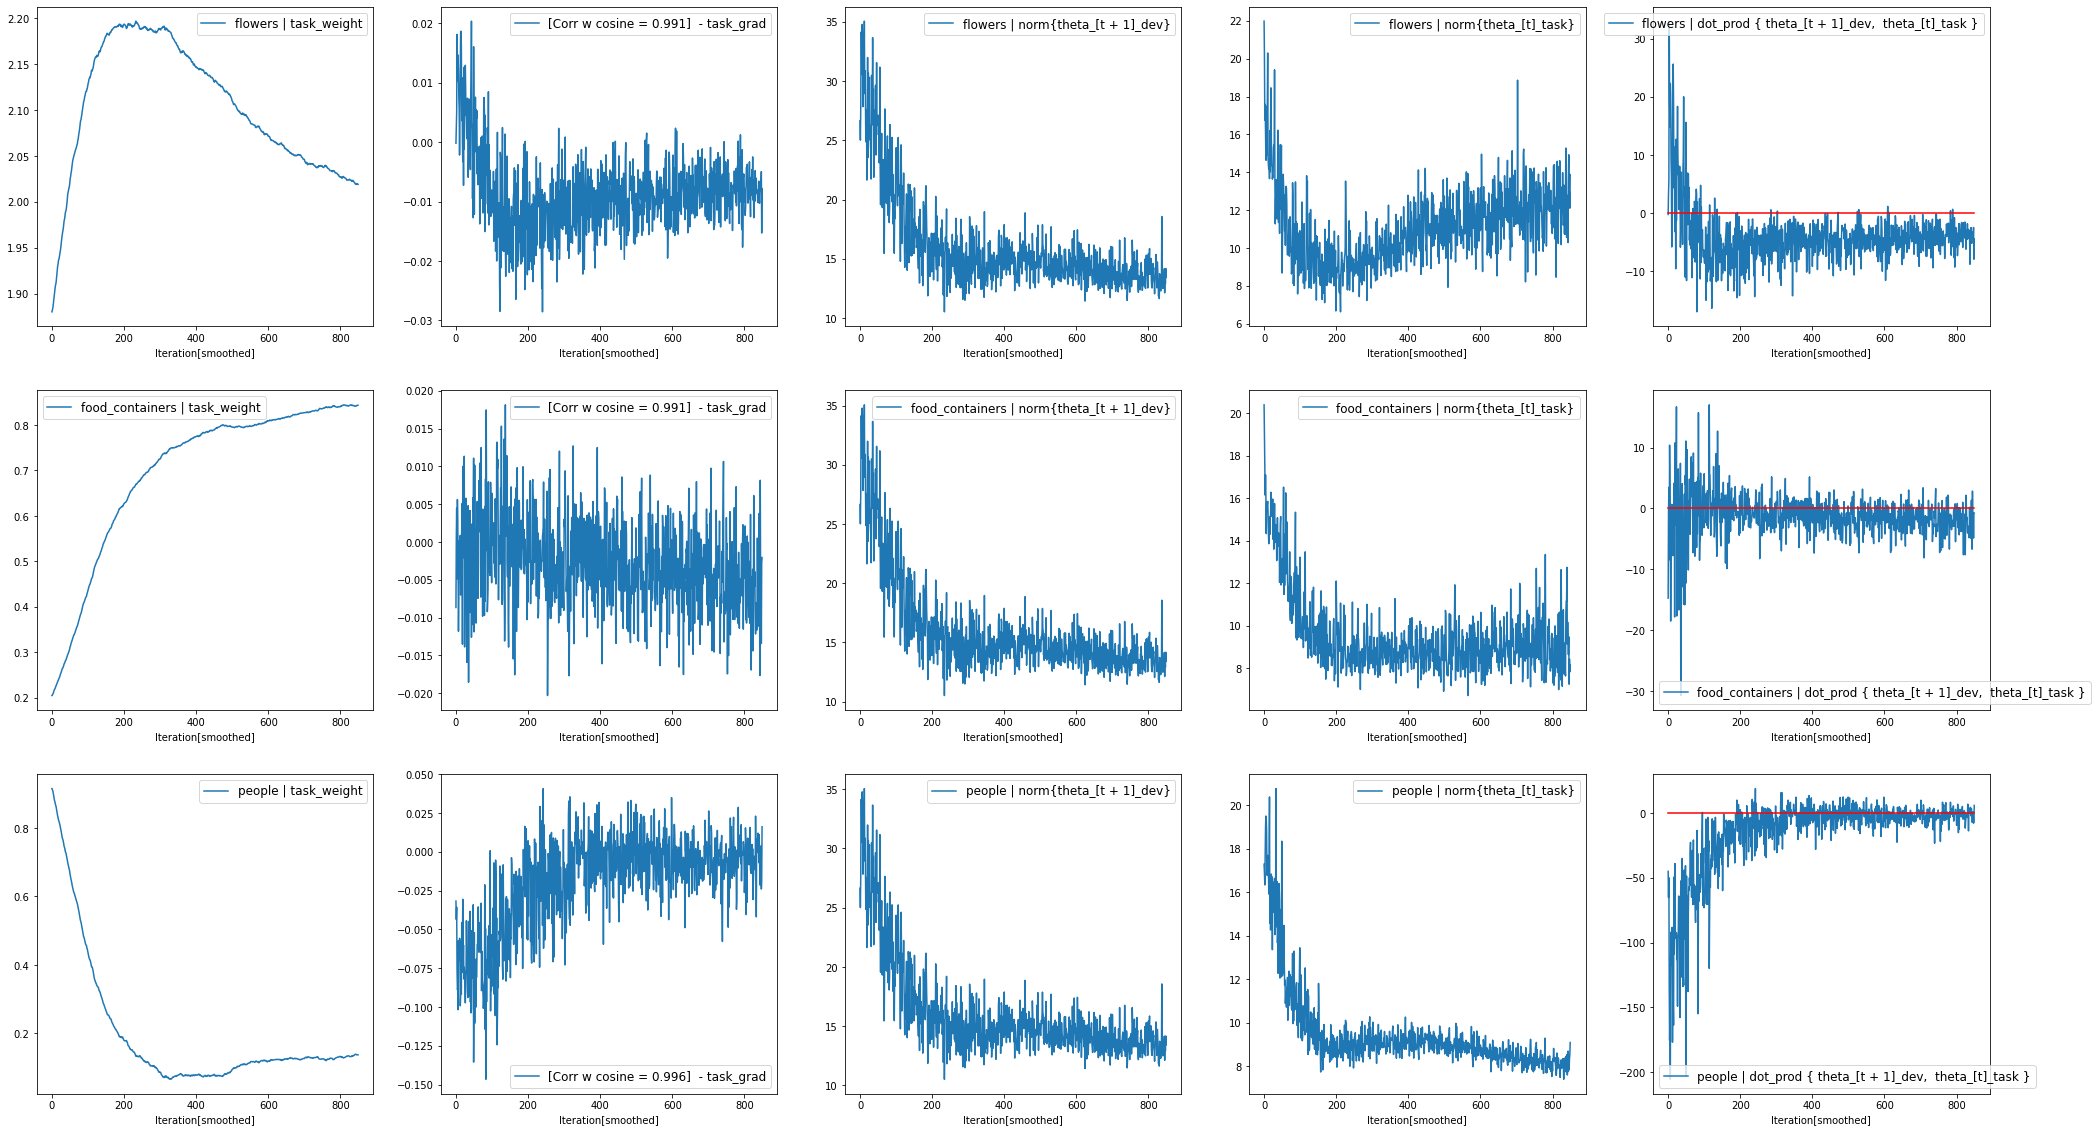

In [141]:
large_lr = 'sgd_vis_tests/cleaned_code/large_lr/meta_people/0/weight_stats.pkl'
data_np = vis_file(large_lr, smooth_factor=2)

# Small Inner LR =. 5e-3. Large outer LR #

(3, 850, 5)


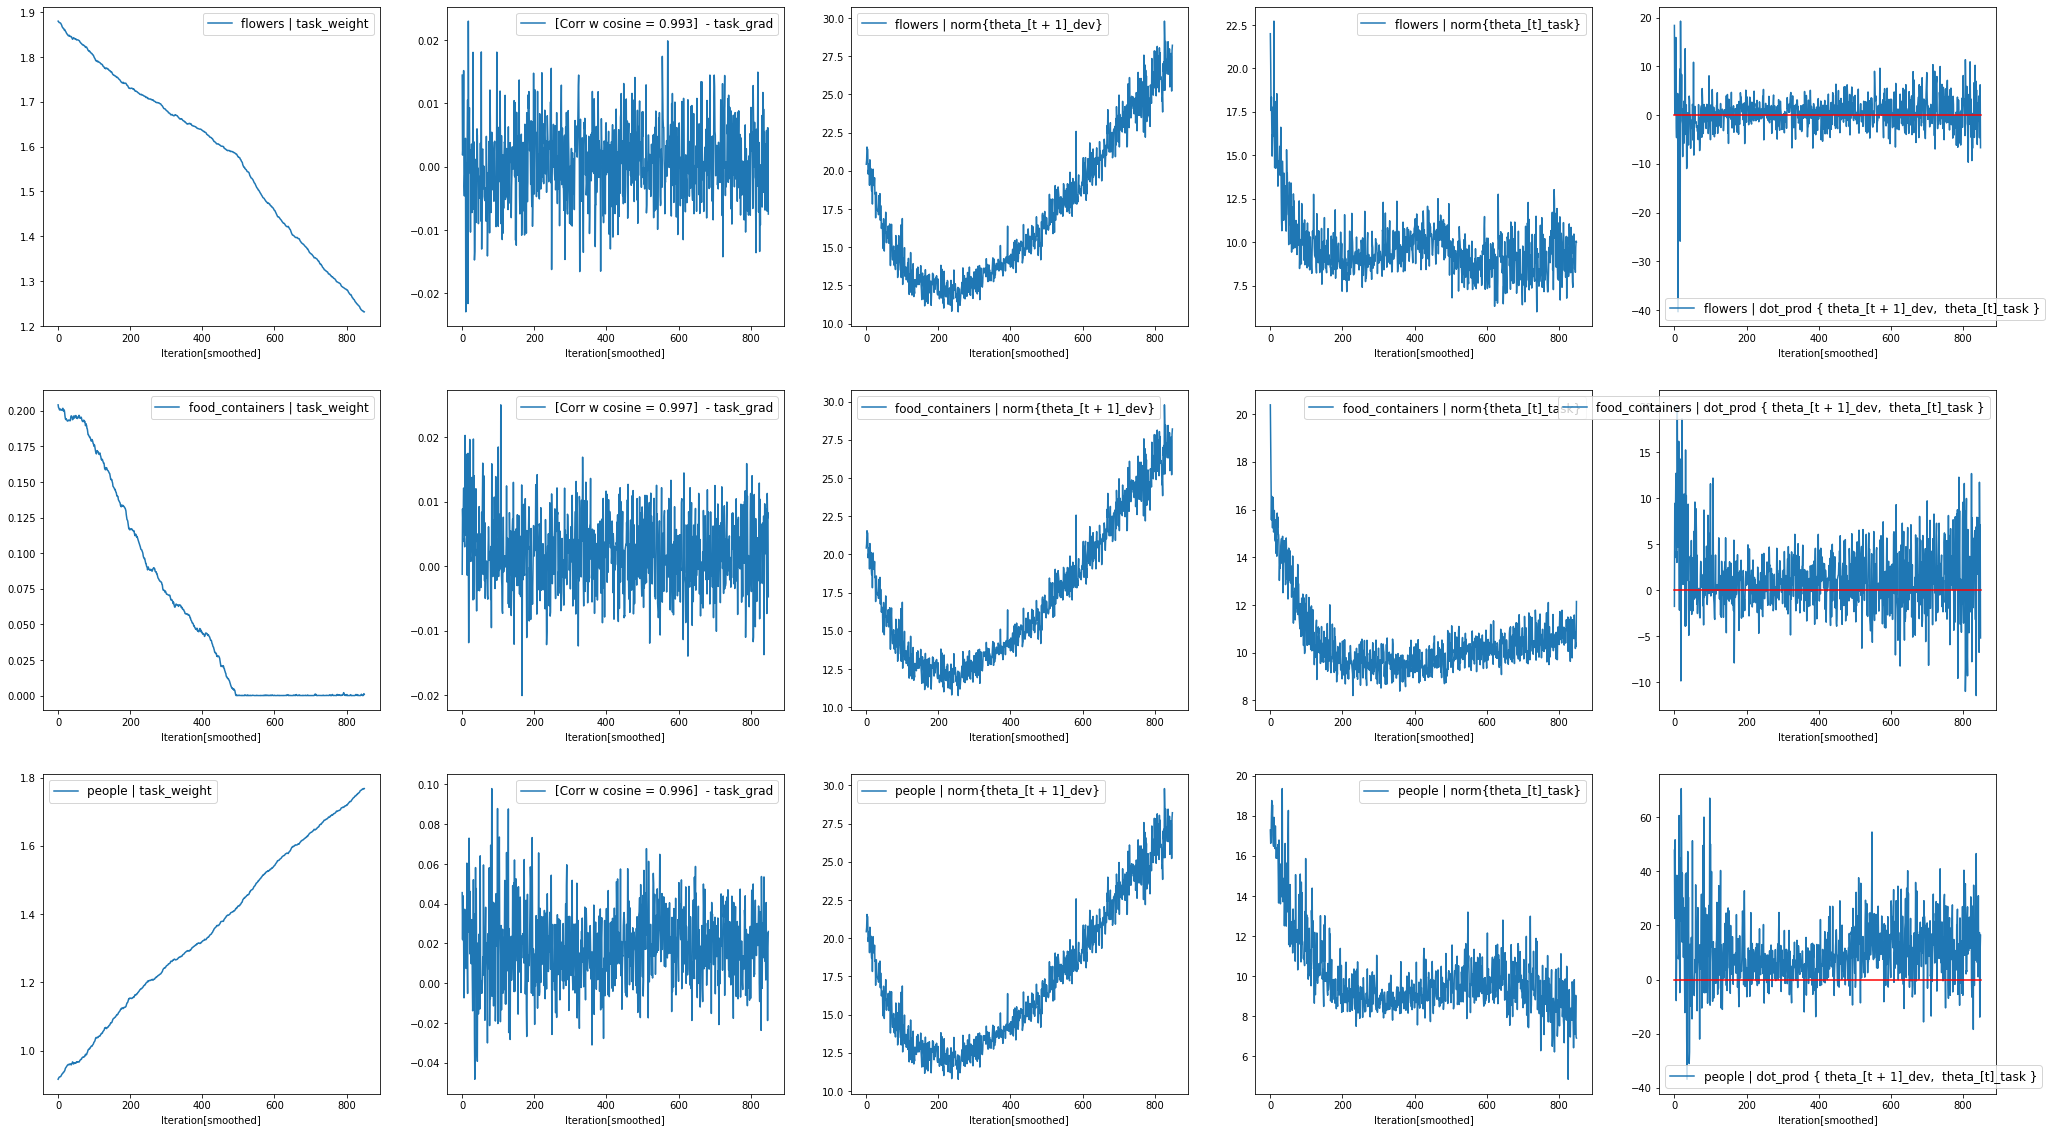

In [145]:
small_inner_large_outer = 'sgd_vis_tests/cleaned_code/smallInner.largeOuter.lr/meta_people/0/weight_stats.pkl'
_ = vis_file(small_inner_large_outer, smooth_factor=2)

# Stepped LR 1e-1 -> x 0.1 every 30 epochs #

(3, 100, 5)


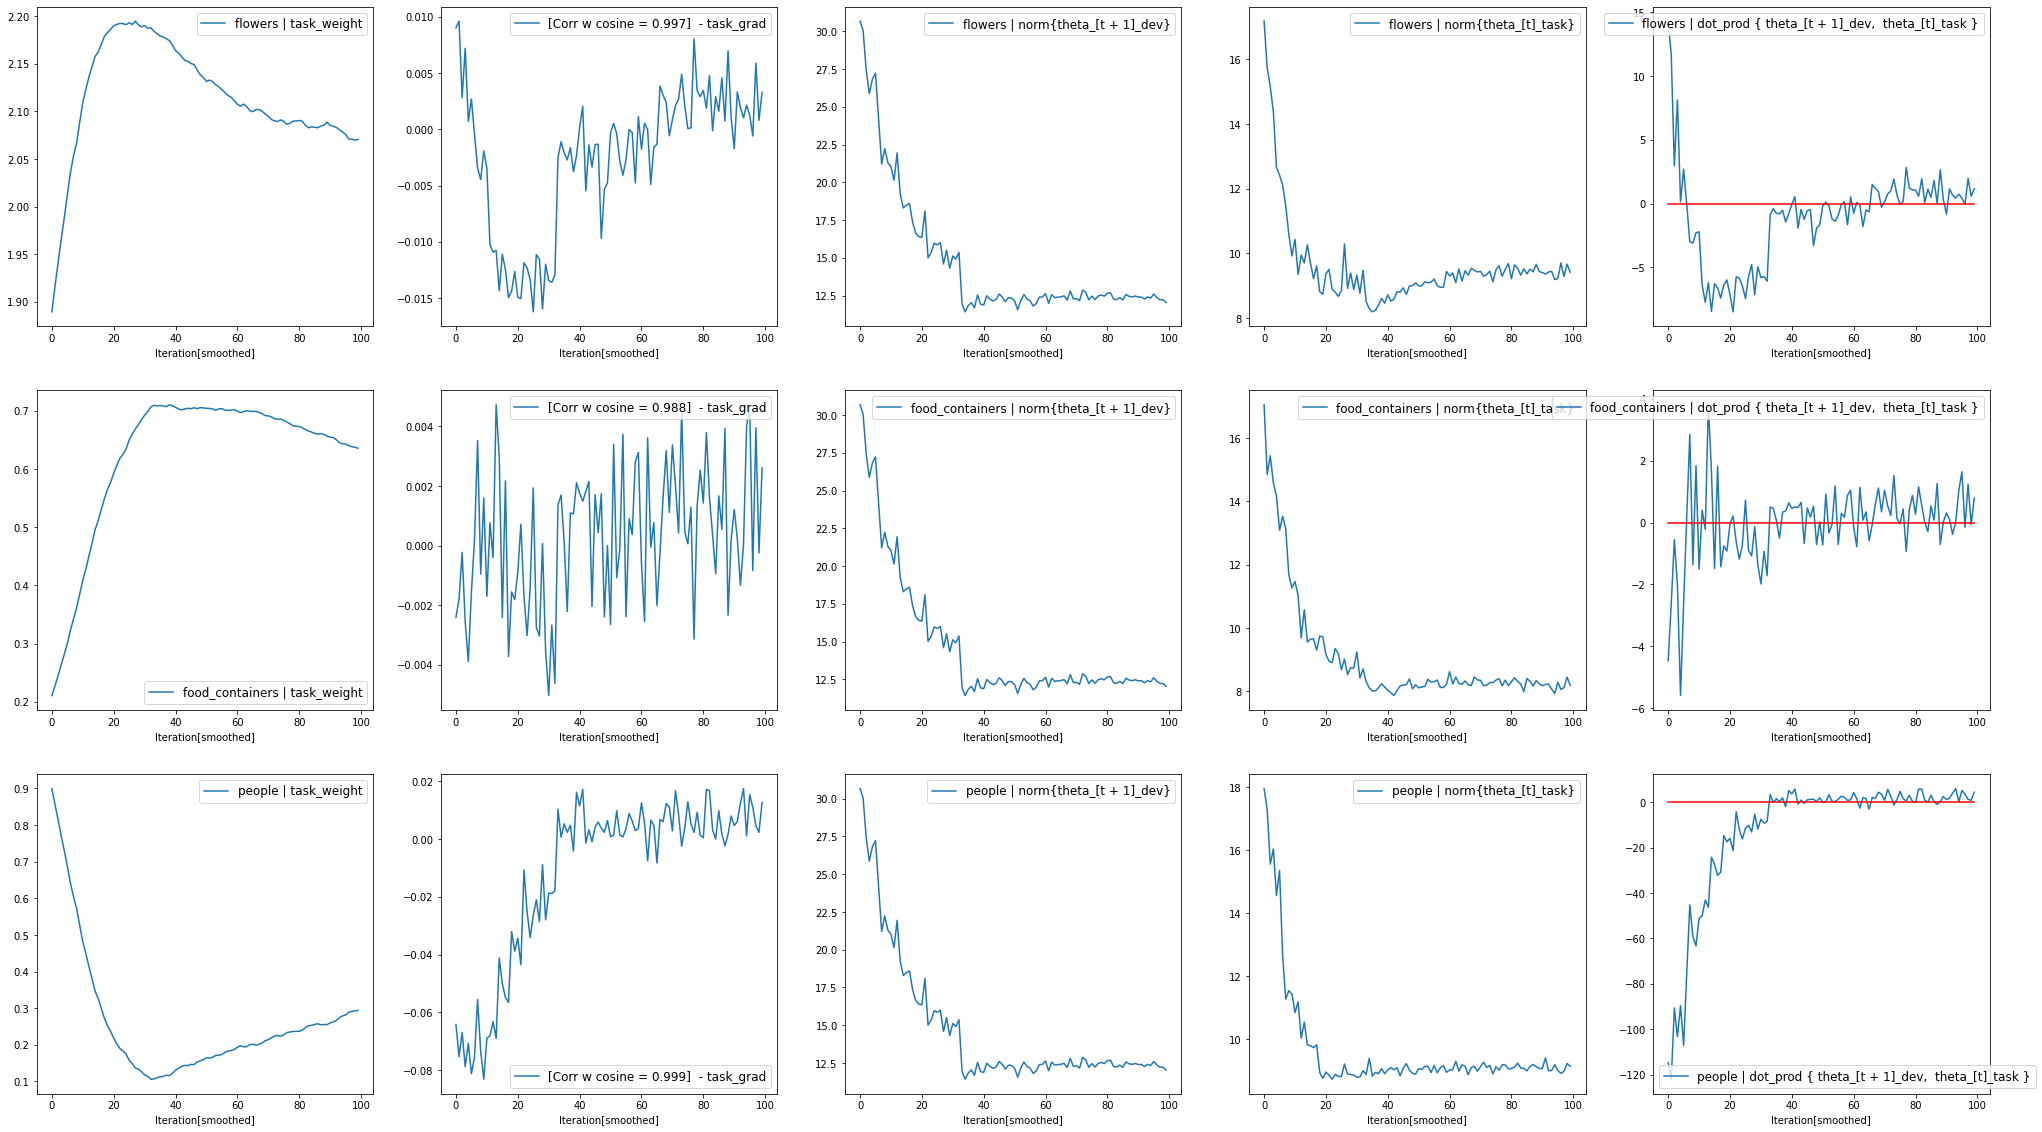

In [146]:
stepped_lr = 'sgd_vis_tests/cleaned_code/stepped_lr/meta_people/0/weight_stats.pkl'
_ = vis_file(stepped_lr, smooth_factor=17)
# Transition occurs @ epoch 30 when the learning rate is reduced

## WITH GROUP BATCHING ##

In [34]:
files = glob("sgd_vis_tests/*/*/*/weight_stats.pkl")
print(files)

['sgd_vis_tests/sgd.linear.sgd_lr.1e-1.lr.1e-1.wlr.5e-2/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/sgd.linear.sgd_lr.1e-2.lr.1e-2.wlr.1e-1.RandInit/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/sgd_lr.1e-1.lr.1e-1.wlr.5e-2_stepped_lr/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/sgd.linear.sgd_lr.1e-1.lr.1e-1.wlr.5e-2_stepped_lr/meta_people/0/weight_stats.pkl', 'sgd_vis_tests/sgd.linear.sgd_lr.1e-2.lr.1e-2.wlr.1e-1/meta_people/0/weight_stats.pkl']


# Small Learning Rate #
Observations : 
1. Evolution of primary task gradient matches expectation. Largely positive and higher in scale than the auxiliary tasks.
2. Primary task Gradients do not match expectations. Expected to be largely negative given that the dot product is largely positive but this is not the case.
    a. Could be responsible for why the graph of this run looks different from 
    
* Todo [ldery] - this run was made with using higher-library instead of manual grad computations. Try to figure out bug. Will affect the Adam runs since those experiments were done with Higher.

(3, 1700, 5)


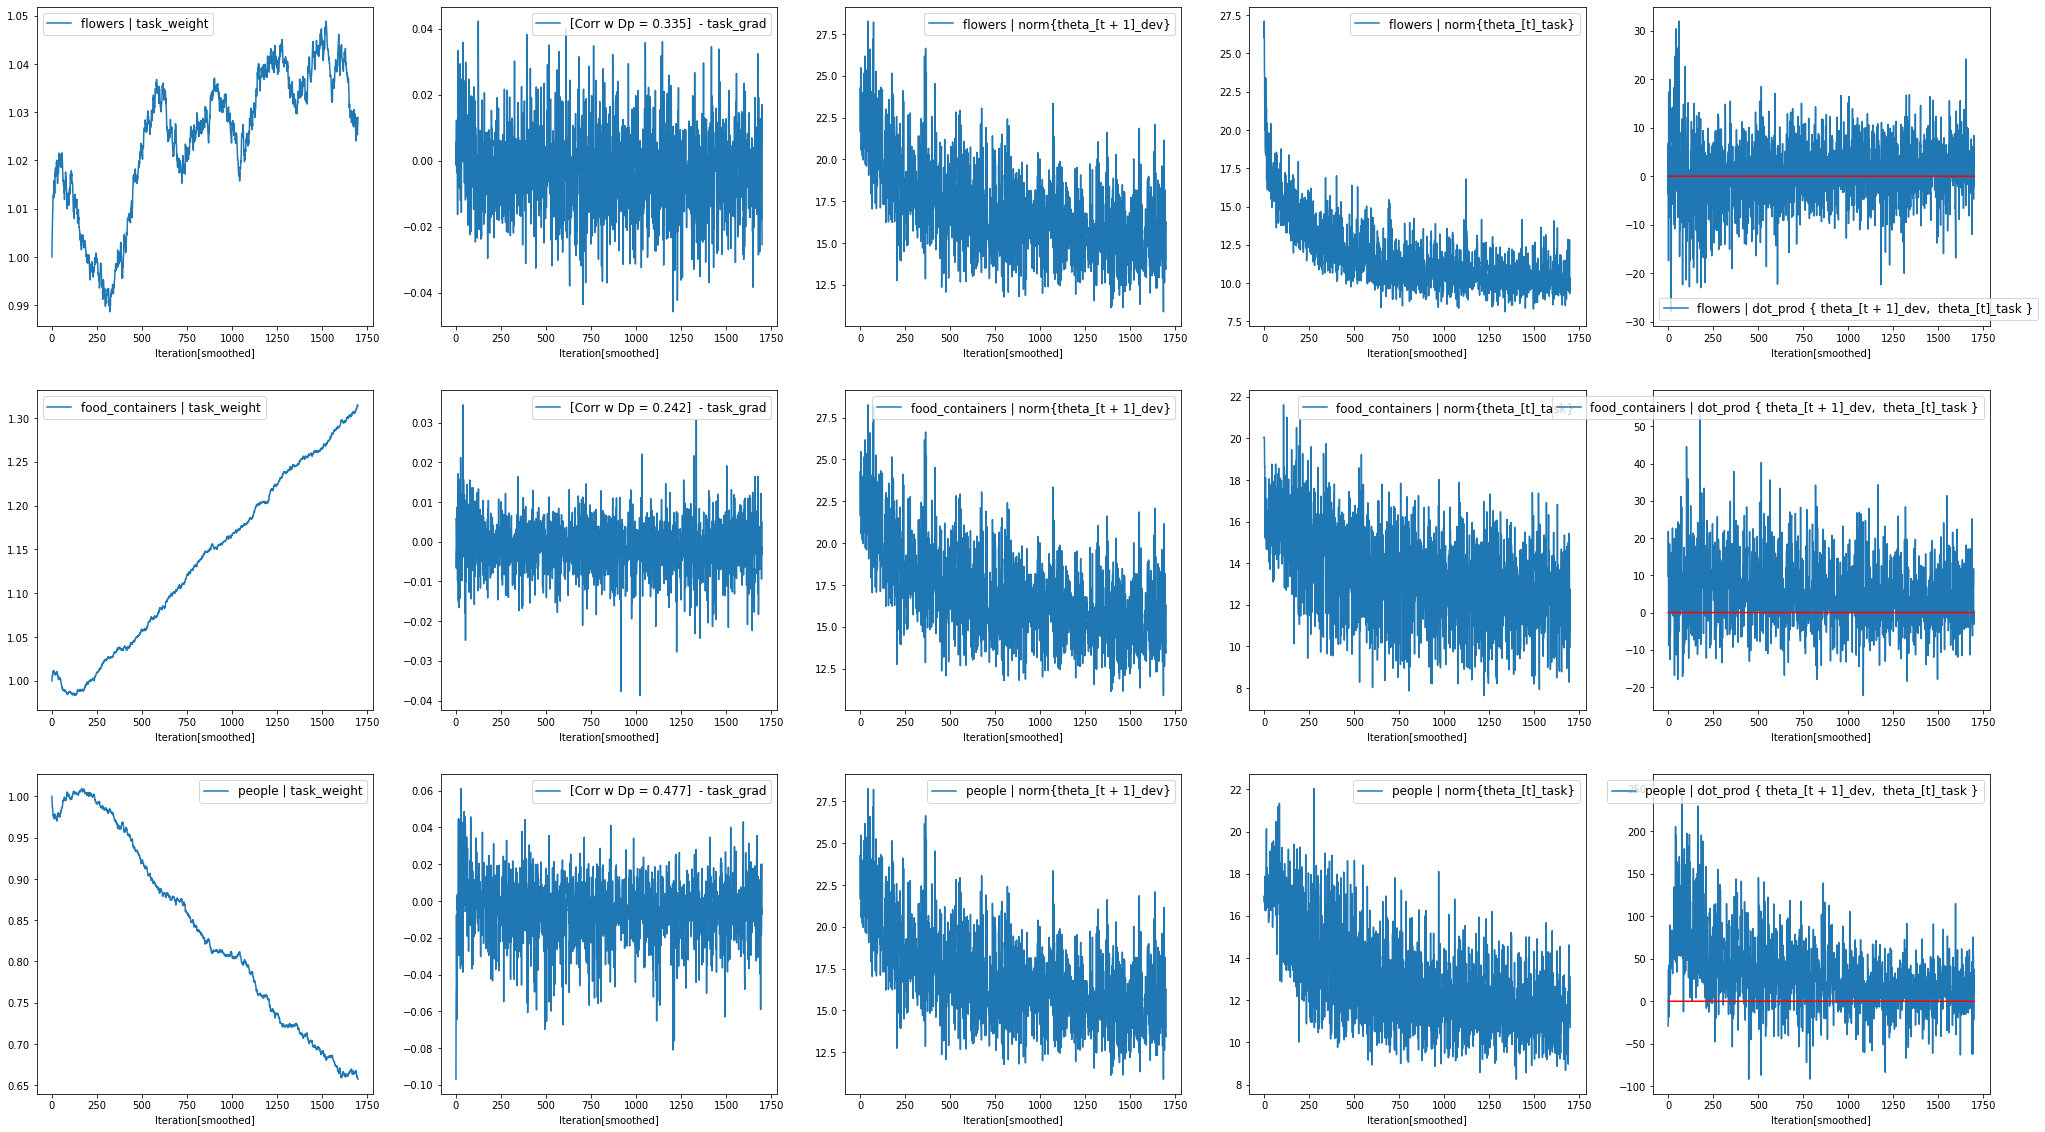

In [43]:
small_lr = 'sgd_vis_tests/sgd.linear.sgd_lr.1e-2.lr.1e-2.wlr.1e-1/meta_people/0/weight_stats.pkl'
vis_file(small_lr, smooth_factor=1)

# Large Learning Rate #
Observations : 
1. Evolution of primary task gradient matches expectation. Less clear trend due to less correlation between gradients evaluate at t, t+1

[Same issue as mentioned before] Primary task Gradients do not match expectations. Expected to be largely negative given that the dot product is largely positive but this is not the case.
    a. Could be responsible for why the graph of this run looks different from 
    
* Todo [ldery] - this run was made with using higher-library instead of manual grad computations. Try to figure out bug. Will affect the Adam runs since those experiments were done with Higher.

(3, 340, 5)


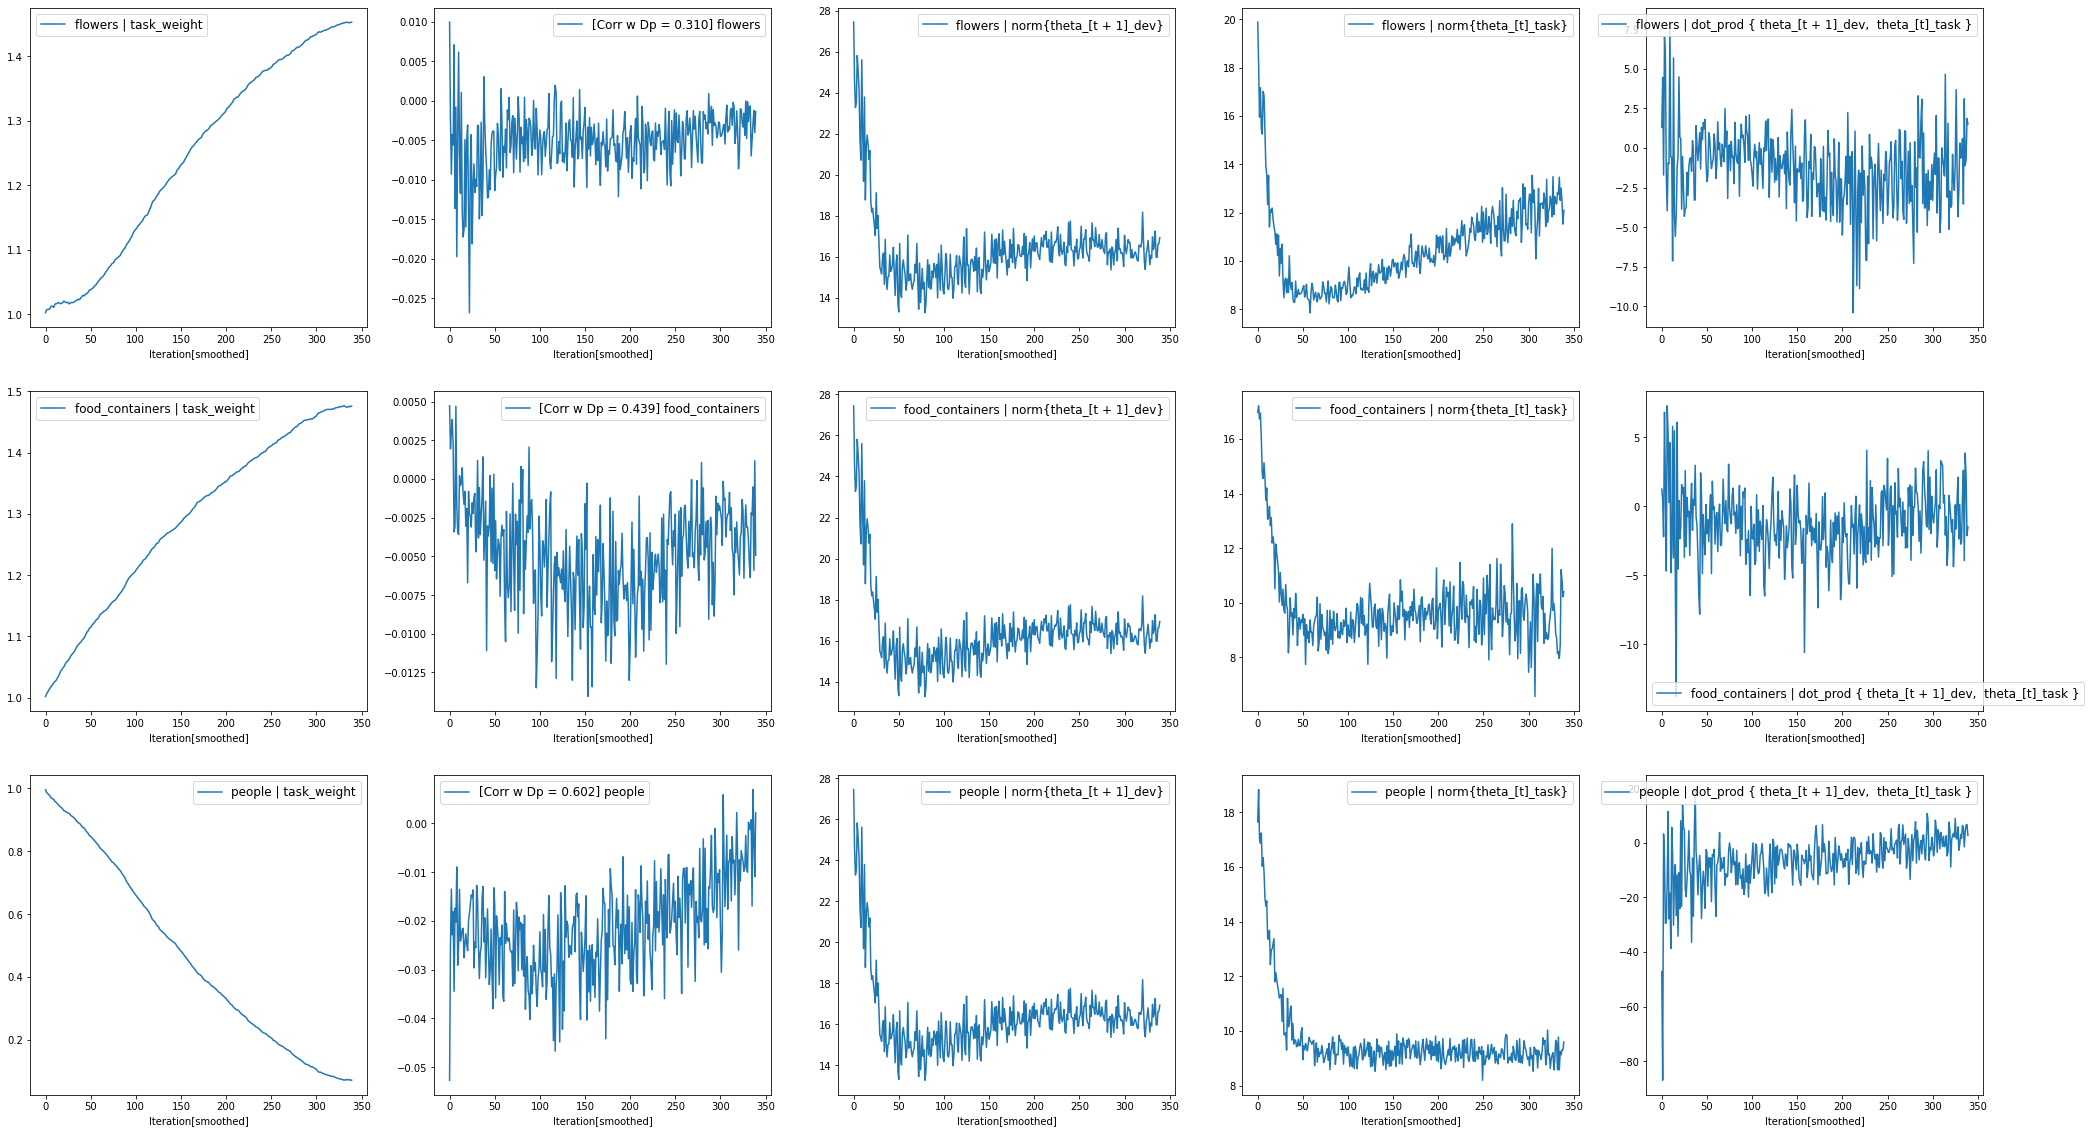

In [68]:
vis_file("sgd_vis_tests/sgd.linear.sgd_lr.1e-1.lr.1e-1.wlr.5e-2/meta_people/0/weight_stats.pkl", smooth_factor=5)

# Large Learning Rate -> Small Learning Rate. Steps @ 30epoch intervals #
Observations : 
1. Evolution of primary task gradient matches expectation. When the learning rate is reduced, the dot product becomes more positive - marking greater aligment between the primary task gradient and dev-gradient (at t+1). See epoch [30] below for the primary task (people)

[*Same issue as mentioned before*] Primary task Gradients do not match expectations. Expected to be largely negative given that the dot product is largely positive but this is not the case.
    a. Could be responsible for why the graph of this run looks different from 
    
* Todo [ldery] - this run was made with using higher-library instead of manual grad computations. Try to figure out bug. Will affect the Adam runs since those experiments were done with Higher.

(3, 340, 5)


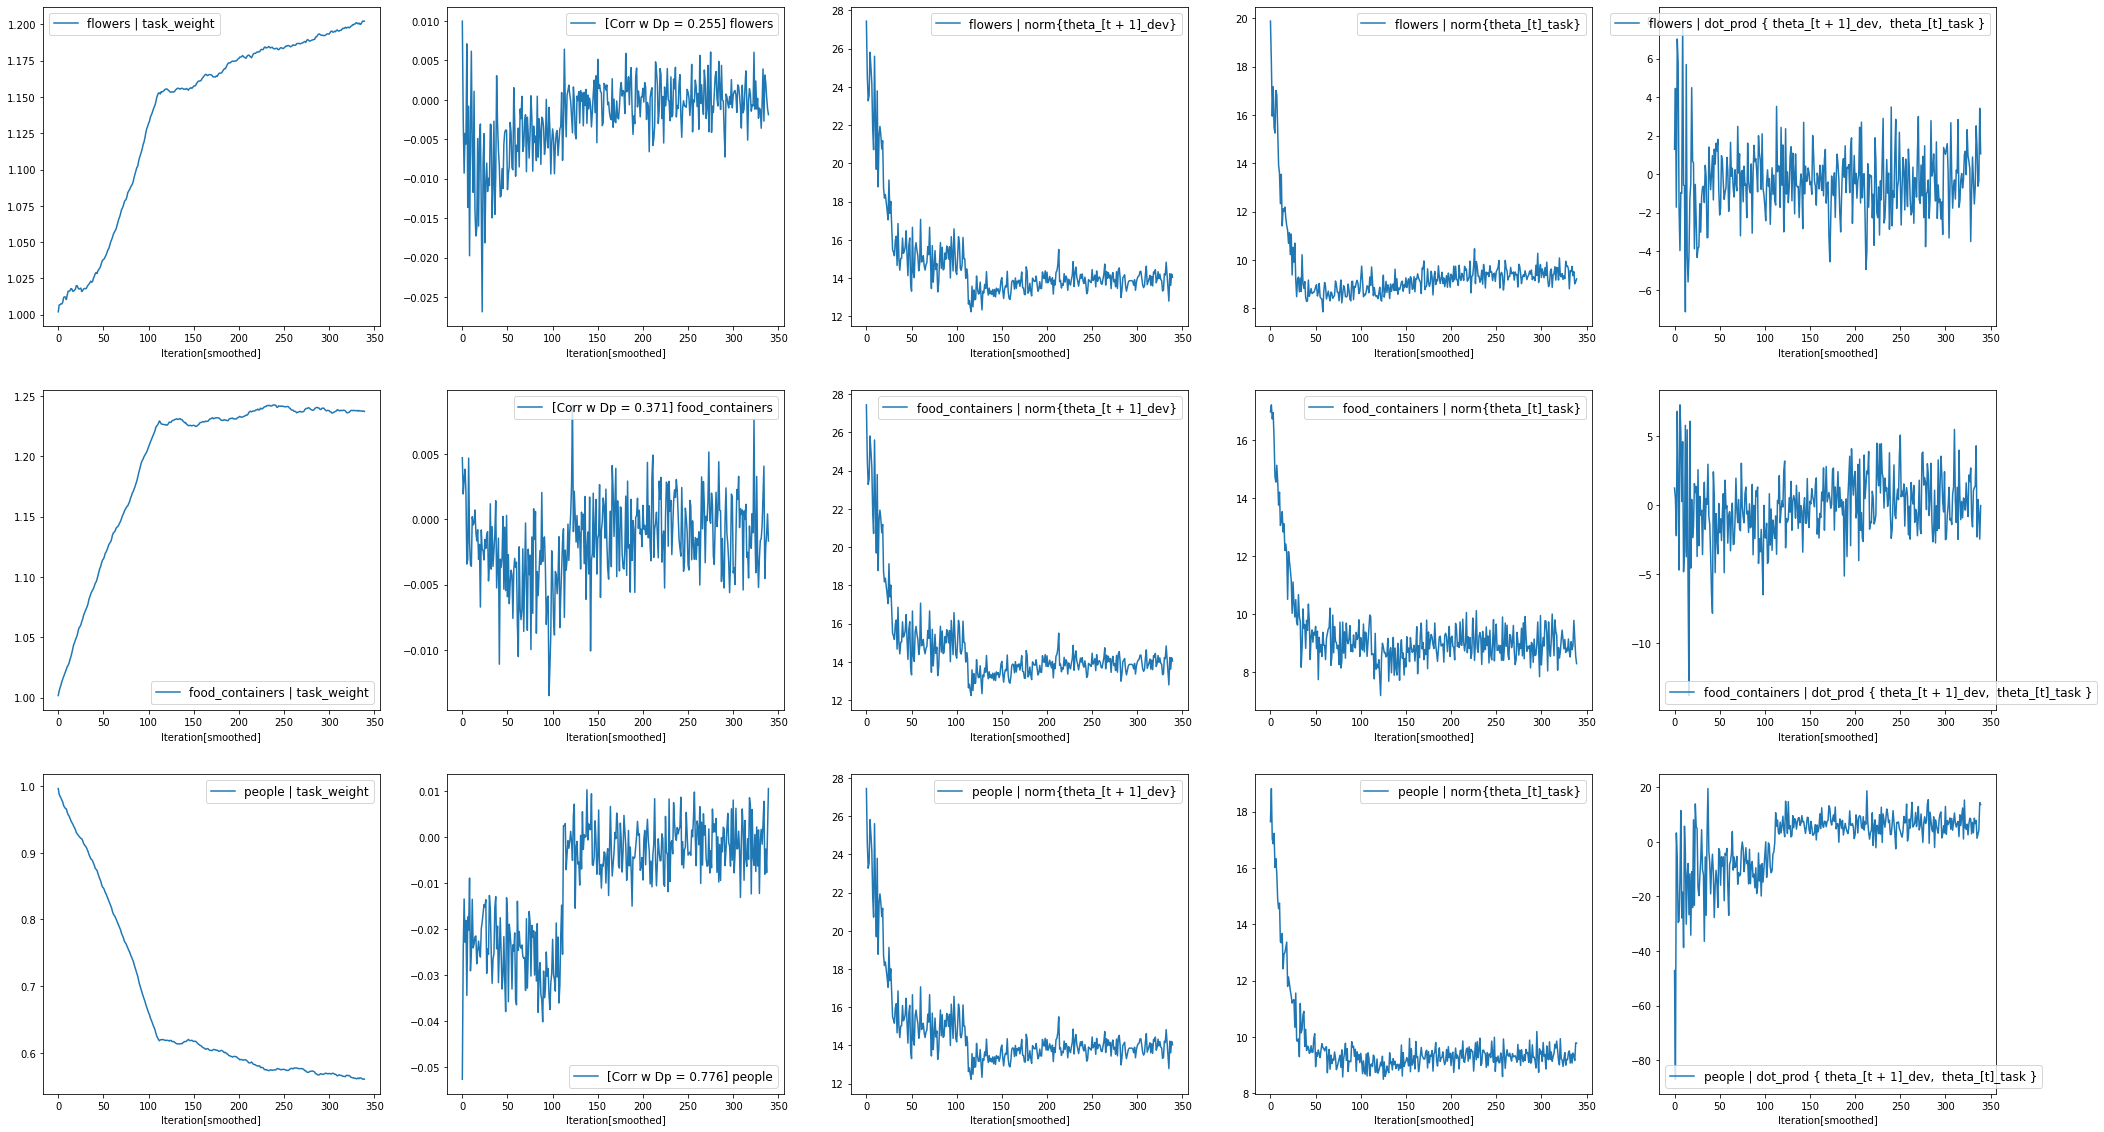

In [69]:
vis_file("sgd_vis_tests/sgd.linear.sgd_lr.1e-1.lr.1e-1.wlr.5e-2_stepped_lr/meta_people/0/weight_stats.pkl", smooth_factor=5)